# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
len(df.index)

294478

**c.** The number of unique users in the dataset.

In [4]:
#The number of unique users with NaN values.

df['user_id'].nunique()


290584

**d.** The proportion of users converted.

In [5]:
# 0 = the number of users that did not convert.
# 1 = the number of users that did convert.
# 'normalize is able to take the given values and convert them into percentages.
# 88% did not convert where as 11% did. Valuesx100= %.


df['converted'].value_counts(normalize = 'true')


0    0.880341
1    0.119659
Name: converted, dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# Looks like 1965 times when 'group' is 'treatment' but 'landing_page' is not
# 'new_page'

df.query("group == 'treatment' and landing_page != 'new_page'")

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
889,839954,2017-01-06 20:58:22.280929,treatment,old_page,0
1037,880442,2017-01-07 21:42:39.026815,treatment,old_page,0
1106,817911,2017-01-17 21:51:43.220160,treatment,old_page,0
1376,844475,2017-01-20 14:25:37.359614,treatment,old_page,0


**f.** Do any of the rows have missing values?

> Rather than use df.isnull(), which will give us a table of true or false where true = missing or null value and false = some value, I wanted to use df.isnull().sum(). This will show many many values are null or missing, which in this case is 0 for the whole table and the answer is 'no' for any missing values.

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

#**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Took forever to figure out how to drop a row with multiple conditions. 

df2 = df.drop(df[(df.group == 'treatment') & (df.landing_page == 'old_page')].index)
df2 = df2.drop(df2[(df2.group == 'control') & (df2.landing_page == 'new_page')].index)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
# querying by user_id because they have the same value.

df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
#Decided to drop by index and checked again to see if it worked. 

#The original code I used wouldn't allow me to run it again and ran and error because I already ran the code
# to drop() it. I've included it below.

df2 = df2.drop(index = 2893)

df2.query('user_id == 773192')


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [14]:
# Taking the total number of people who converted and dividing by the number of total converts (mean) 
# 11%

p_pop = df2["converted"].mean()

print(p_pop)

0.119597087245


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Had to go back in the notes to figure this one out.
# 12 %

control_conv = df2.query('group == "control"')['converted'].mean()

print(control_conv)

0.1203863045


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Same as above, had to go back in the notes to figure this one out.
# 11%

treatment_conv = df2.query('group == "treatment"')['converted'].mean()

print(treatment_conv)

0.118808065515


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [17]:
# conversion rate used for later.
# less than 1%

obs_diff = treatment_conv - control_conv

print(obs_diff)

-0.00157823898536


**d.** What is the probability that an individual received the new page?

> Grabbing the number of times 'new page' is in landing_page and totaling that number by sum(). len() gives you the number of rows in a df, which comes in handy when dividing by all of rows.
>
> 50%

In [18]:
((df2['landing_page'] == 'new_page').sum())/len(df2)



0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

> The probability of someone converting regardless of the page they recieve is ~ 11%.
>
> If the individual was in the 'control' group, the probability of them converting was ~ 12%.
>
> If the individual was in the 'treatment' group, the probability of them converting was ~ 11%.
>
> The probability that someone would receive the 'new_page' is ~ 50%.
>
> 50% of group users were receiving 'new_page' but the probability of them converting while they were in the treatment group was only 11%. There is only a 1% difference between the 'treatment' and 'control' group. Either the 'treatment' with 'new_page' isn't working or we don't have enough information.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

> <b>Notes from videos:</b>
>
> The null hypothesis is the condition we believe to be true before we collect any data $H_{0}$
>> - commonly associated with two groups being equal or of an effect being 0.
>> - $H_{0}$ and $H_{1}$ should be competing and non overlapping.
>> - usually hold operators =, <=, and >=.
>
> The alternative hypothesis is what we want or what we want to prove to be true $H_{1}$
>> - usually holds !=, >, and <.
>
> <b>Answer:</b>
>
> If we are assuming that the old page is better (unless the new page proves to be considerably better, which it didn't)
> the null hypothesis is:
>> $H_{0}$ : $P_{old}$ >= $P_{new}$
>
> The alternate hypothesis (that the new page is better than the old page):
>> $H_{1}$ : $P_{old}$ < $P_{new}$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
# So if p_pop from section (1.4 A) =  0.119597087245 and the equation above is 
# p_new = p_old = p_pop. Than p_new has to equal the same thing as p_pop???

p_new = df2['converted'].mean()
p_new


0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
# The same rationalization as above.

p_old = df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

> Filtering where group == treatment & landing_page == new_page gave me the list of the 145310 rows and columns that fit what I was asking for but this became an issue in the hypothesis testing below because it wasn't 1 dimensional. Figured out that shape[0] will give you the number (dimensionally) of what I was asking for instead. However, len() works better because len() grabs all of the rows, and since I'm filtering by query

In [21]:
n_new = len(df2.query('group == "treatment" & landing_page == "new_page"'))
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
# Same thing as above. Assuming they are being shown the old_page because the treatment group is 
# being shown the new_page.

n_old = len(df2.query('group == "control" & landing_page == "old_page"'))
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

> After an intense amount of googling I finally figured out the syntax. Explained below. 
>
> <b>np.random.choice:</b>
>
> <b>a</b> = the array you want to use, I'll use 1's and 0's here. 
>
> <b>size</b> = the size of the output array. Using n_new because that's what we want to simulate.
>
> <b>replace</b> = if you want a replacement. won't be using here.
>
> <b>p</b> = the probabilites associated with the input array. Using p_new we're simulating with this particular conversion rate.
>
> At this point I was stuck. I couldn't figure out why I was only getting an "array([1, 0, 1, ..., 1, 0, 0])" for both new_page_converted and old_page_converted. I was able to figure out np.random.choice actually displys the array you're asking for! However, I needed a number, not the whole array. Then I realized that just like in the conversion rates, I used mean(). Since I'm working with np here, I'll call np.mean()

In [23]:
new_page_converted = np.mean(np.random.choice([0,1], n_new, p_new))

new_page_converted

0.49974537196338864

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Explanation same as above.

old_page_converted = np.mean(np.random.choice([0,1], n_old, p_old))
old_page_converted

0.49981414430662058

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
# Finding the difference with our new converted probabilities.

sim_diff = new_page_converted - old_page_converted
sim_diff



-6.8772343231937594e-05


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Used the sampling distribution example in the videos/jupyter notebook as a outline.
# Taking the same variables as above and plugging them in, we're just recreating the same thing 10,000 times.
# We have to actually put the new_page_converted and old_page_converted list sampling distrubution into an array.

p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=[1-p_new,p_new])
    old_page_converted = np.random.choice([0,1], n_old, p=[1-p_old,p_old])
    p_diffs.append(np.mean(new_page_converted) - np.mean(old_page_converted))

    
# Storing it all in a NumPy array called p_diffs. 

p_diffs = np.array(p_diffs)
print(p_diffs)


[-0.00011926  0.00076877  0.00196627 ...,  0.00126429  0.00173923
  0.00044507]


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

> Notes: 
>
> plt.axvline() method to mark the actual difference observed  in the df2 data (recall obs_diff), in the chart.
>
> The number of values in each bin determine the height of the each histogram bar.
>
> If it's a symmetrical bell curve, the mean=median=mode.



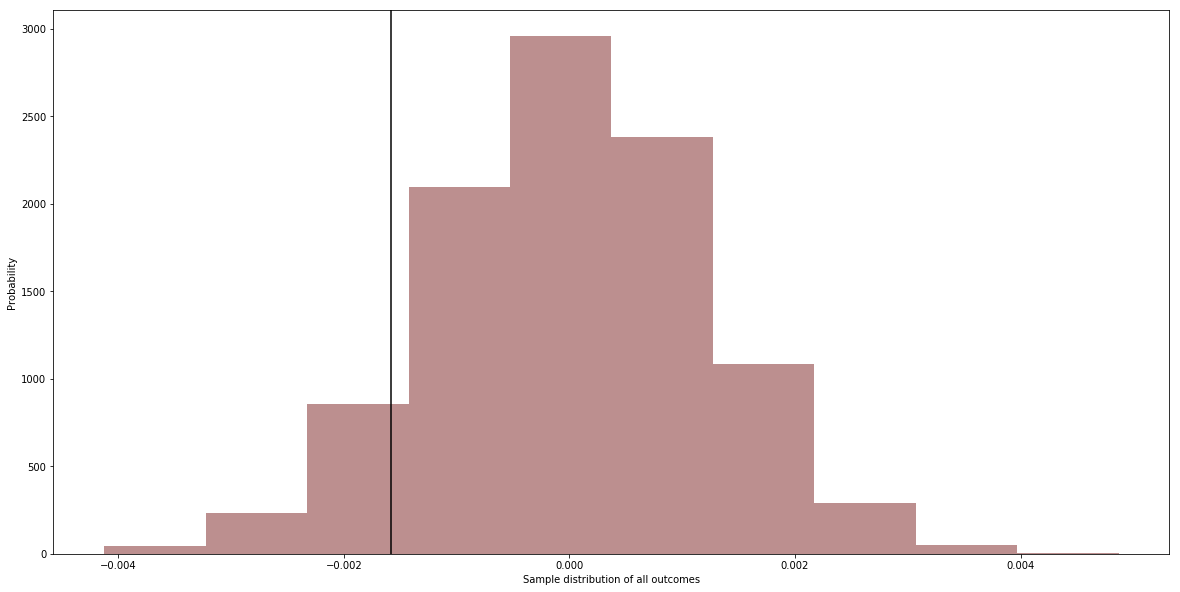

In [27]:
# Plot the historgram p_diffs 

plt.figure(figsize=(20,10))
plt.hist(p_diffs, color='rosybrown')

# Plot the x and y labels.

plt.xlabel("Sample distribution of all outcomes")
plt.ylabel("Probability")

# Adding a vertical line across the axes (axvline) by using obs_diff???
# Used matplotlib axvline documentation to figure out how to turn the line a different color than blue.

plt.axvline(obs_diff, color = 'black')





**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
# taking the difference. Using np.mean() to find the acutal mean instead of getting an array.
# 'actual difference' = obs_diff reference from the first section.
# finding 'greater than'


np.mean(p_diffs>obs_diff)

0.90890000000000004

> <b> What was computed above?</b>
>
> 91% of p_diffs (simulated) is greater than obs_diff (actual).
>
> <b> What is this value called in scientific studies? </b>
> 
> This is called the p-value. It tell us how likely it is that the null value is true. My null value assumed that $H_{0}$ : $P_{old}$ >= $P_{new}$
>
> <b>What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)"</b>
>
> Type 1 error rate (0.05) tell us that is the null hypothesis is true, it only has a 5% or less chance of occuring. If a p-value is greater than 0.05 it indicates weak evidence against the null hypothesis and therefore can't reject it. Because my hypothesis was $H_{0}$ : $P_{old}$ >= $P_{new}$, it means that there's not enough evidence to support rejecting the old_page.
>
> 

> Notes to summarize the above:
>
>- $P_{new}$: Conversion rate for new page: ~ 11% 
>
>- $P_{old}$: Conversion rate for old page: ~ 11% (same value as new page)
> 
>- $N_{new}$: The number of individuals in the treatment group that were shown the new page: 145310
>
>- $N_{old}$: The number of individuals in the control group that were shown the old page: 145274
>
>- The <b>simulated</b>  $N_{new}$ with a conversion rate of $P_{new}$: note sure, given an array.
>
>- The <b>simulated</b> $N_{old}$ with a conversion rate of $P_{old}$: not sure, given an array.
>
>- The differnece in converted probability with <b>simulated</b> $N_{new}$ - $N_{old}$: ~  less than -1.0??
>
>- <b>p_diffs</b>: Recreated a sampling distrubution over 10,000 times with the values from above: 
>>-  [  6.88478912e-04  -3.16731713e-04   8.33045278e-04 ...,  -4.54568018e-04..., -6.93794556e-05   1.39688708e-03]
>
>- Plotted the above value <b>p_diffs</b>: Ranges from -0.008 - 0.006. Also taking into consideration <b>obs_diffs</b> which was (0.00157823898536)
>
>- <b>prop_pdiffs</b>: proportion of the <b>p_diffs</b> that are greater than the <b>obs_diff</b> observed: 
>>-  [-0.00088976, -0.00189497, -0.00074519, ..., -0.00203281, -0.00164762, -0.00018135])



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
# Not sure if I'm supposed to use n_new or n_old variables from a few sections above.
# Going with just the number of individuals who were just shown old_page/new_page.



import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))

print('number of conversions with the old_page: ', convert_old)
print('number of conversions with the new_page: ', convert_new)
print('number of individuals who were shown the old_page: ', n_old)
print('number of individuals who received new_page: ', n_new)

# just wanted to make sure I was getting the right results. len() on query works better.
# testing = len(df2[(df2['landing_page'] == 'old_page') & df2['converted'] == 1])


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


number of conversions with the old_page:  17489
number of conversions with the new_page:  17264
number of individuals who were shown the old_page:  145274
number of individuals who received new_page:  145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [30]:
# Grabbing the variables from above and plugging them in.
# My alternative hypothesis was H1: Pold < Pnew, or 'smaller'

import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest((convert_old, convert_new), (n_old, n_new),  alternative='smaller')


print('z_score is:', z_score)
print('p_value is:', p_value)



z_score is: 1.31092419842
p_value is: 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.
>
> <b>Answer:</b>
>
> The p-value converted above is 9%, while the p-value in J was 91%. While the p-value of 9% is still greater than 5% (not by much), it means that there is still weak evidence against the null hypothesis and therefore still can't reject it, meaning that the conversion rates for the old_page are still greater than conversion rates for the new_page. The z-score tells us about standard deviation (how far above or below the man the score is). It's 1.3 standard deviations from the mean.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> <b>Answer:</b>
>
> Logistic Regression is used to compute the probability of mutually exclusive occurrences (pass/fail, 0/1, true/false). We will be using regression here. I was able to find an article online that explained the different types of regression.
>
> <b>Source:</b>
> https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
# Adding in 'intercept column' with constant of 1. Checking with sample() to make sure it's there.

df2['intercept'] = 1
df2.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept
10076,812947,2017-01-03 22:54:58.768525,treatment,new_page,0,1
215749,651391,2017-01-08 20:45:21.481429,treatment,new_page,0,1
195807,813191,2017-01-16 14:17:20.346728,control,old_page,0,1
239066,895726,2017-01-19 00:27:27.253413,control,old_page,0,1
109256,688047,2017-01-11 11:35:44.019977,treatment,new_page,0,1


In [32]:
# Adding in 'ab_page' with conditions via a for loop. 
# okay this was really cool. 


ab_loop = []
for x in df2["group"]:
    if x == 'treatment':
        ab_loop.append(1)
    else:
        ab_loop.append(0)
        
df2['ab_page'] = ab_loop
df2.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
157002,883513,2017-01-20 06:07:52.012135,treatment,new_page,0,1,1
159270,910066,2017-01-06 07:09:04.245559,control,old_page,0,1,0
36326,822863,2017-01-21 23:18:01.340411,treatment,new_page,0,1,1
147327,752031,2017-01-16 13:47:25.848931,treatment,new_page,0,1,1
35136,755262,2017-01-04 15:06:37.545309,treatment,new_page,0,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


> Grabbing an example used in the videos in the classroom.
>
> Putting 'converted' in the y axis and 'intercept' and 'ab_page' on the x axis because I found it in the mentor questions/answers.
>
> MAJOR NOTE: ab_page kept throwing an error. I couldn't figure it out until I realized that when I made the for loop in the above section that I put ' ' around 0 and 1, which turned it into a string. For this to work it needed to be in int/float.
>
> Once I got rid of the ' ', it worked. 

In [36]:
# Fitting the model with Logit() because we are handling a dependent categorical variable.

regression_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = regression_model.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

> When I ran the original results.summary() with Logit() from above, it kept running an error:
>
> <b>AttributeError: module 'scipy.stats' has no attribute 'chisqprob'.</b>
>
> I was able to find out that when calling summary() on Logit(), it has a specific summary() you need to use. Turns out it is just summary2(). Good to know.

In [37]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-12-07 22:17 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

> <b>Answer:</b>
>
> The p-value here is 19%. The p-value found in part 2 was 9%. The p-value in the regression model is the same as part 2 in that is it still above 0.05, it means that there is still weak evidence against the null hypothesis and therefore still can't reject it, meaning that the conversion rates for the old_page are still greater than conversion rates for the new_page.
>
> The alternative hypothesis from part 2 was $H_{1}$ : $P_{old}$ < $P_{new}$, that the new_page would have more conversions than the new page. The null hypothesis was $H_{0}$ : $P_{old}$ >= $P_{new}$, that the old_page would have more conversions than the new_page. ab_page being 19% suggests that there is still no evidence to support that new_page increases conversions.
>
> The null and alternative hypothesis for the regression model are, being that there are only 0 and 1:
>
> $H_{0}$ : $P_{old}$ - $P_{new}$= 0
>
> $H_{1}$ : $P_{old}$ - $P_{new}$!= 0

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Adding other things into the model would be a good idea because it can show us what else is or is not an influence on if someone converts. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('countries.csv')
countries_df.sample(5)

,user_id,country
10392,781394,US
102939,738586,US
250856,718906,US
280534,831091,UK
227005,786681,US


In [39]:
# I tried outer merge() via user_id first. All was fine until I had to join the dummie columns below. 
# Found out that merge() merges via columns and not index. 

final_df = pd.merge(df2, countries_df, on="user_id", how="outer")

# fixing the name.

df_merged = final_df
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [40]:
# double checking old and new.

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


> Making sure that I have the right dummies and fixing prefix to make it easier to understand once I merge them. 
> Got rid of Country_CA via the \drop_first = True\ to establish the baseline (only using two variables as required in the instructions above)
>
> If Country_UK(0) and Country_US(1) == Country_US
>
> If Country_UK(1) and Country_US(0) == Country_UK
>
> If Country_UK(0) and Country_US(0) == Country_CA
>
> <b>Note:</b>
>
> The first time I tried to do this, I used 
>
> dummie_test = pd.get_dummies(df_merged.country, prefix='Country').sample(7)
>
> dummie_test.drop('Country_CA', axis=1, inplace=True)
>
> It dropped the Country_CA column, as I wouldn't be needing it. However, it became a problem when I tried to merge them later on. It created multiple different column with Country_US and Country_UK, then I tried dropping them later on again and it created even more dummie columns! I finally figured out that get_dummies has a drop_first feature, and it will drop the first dummie variable. I was stuck on this for hours.

In [41]:
# Creating a the dummie_test variable and dropping the first variable.

dummie_test = pd.get_dummies(df_merged.country, drop_first=True, prefix='Country')


dummie_test.head()

,Country_UK,Country_US
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
# Merging dummie_test and df_merged together via concat().

df_merged = pd.concat([df_merged, dummie_test], axis=1)

df_merged.sample(10)



,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,Country_UK,Country_US
60075,865257,2017-01-20 21:38:20.418602,control,old_page,0,1,0,US,0,1
247614,931567,2017-01-17 09:58:49.580465,control,old_page,0,1,0,UK,1,0
148822,777541,2017-01-12 01:58:52.639218,treatment,new_page,0,1,1,US,0,1
12746,782539,2017-01-22 05:34:21.484388,control,old_page,0,1,0,US,0,1
187461,789903,2017-01-20 23:36:57.922853,treatment,new_page,0,1,1,US,0,1
167312,865438,2017-01-07 10:32:32.348653,control,old_page,0,1,0,UK,1,0
56660,919787,2017-01-23 03:12:49.249324,control,old_page,0,1,0,US,0,1
230620,775770,2017-01-18 02:21:11.218977,treatment,new_page,0,1,1,US,0,1
8775,894109,2017-01-12 06:27:34.289965,control,old_page,1,1,0,US,0,1
260168,841406,2017-01-23 11:09:42.386401,treatment,new_page,1,1,1,US,0,1


In [43]:
# Making sure there was no dupliactes.

df_merged.duplicated().count()

290584

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [44]:
# Using the same outline used for the regression model in the last section to fit the model.

country_regmodel = sm.OLS(df_merged['converted'], df_merged[['intercept', 'Country_UK', 'Country_US']])
final_results = country_regmodel.fit()
final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.201
Time:                        22:18:52   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
Country_UK     0.0053      0.003      1.787      0.074      -0.001       0.011
Country_US     0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Conclusion
>
> P-value for <b>ab_page:</b> 0.190, 19%
>
> P value for <b>Country_UK:</b> 0.07, 7%
>
> P Value for <b>Country_US:</b> 0.13, 13%
>
> The above p-values for Country_UK and Country_US don't seem so have a massive effect on conversions. Country_UK is close to 0.05 but still not below 0.05. for all p-value summary, it means that there is still weak evidence against the null hypothesis and therefore still can't reject it, meaning that the conversion rates for the old_page are still greater than conversion rates for the new_page, even with factoring in the Country_UK and Country_US. 

In [45]:
# Creating new columns for ab_page interaction with countries. Not sure if we're supposed to use ab_page or landing_page??
# I grabbed this from the videos in the classroom.

df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['Country_UK']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['Country_US']
df_merged.sample(10)


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,Country_UK,Country_US,ab_UK,ab_US
2880,862824,2017-01-08 13:28:06.323970,control,old_page,0,1,0,US,0,1,0,0
263656,657041,2017-01-23 02:21:37.900373,treatment,new_page,0,1,1,CA,0,0,0,0
218100,783989,2017-01-15 09:50:04.600108,treatment,new_page,0,1,1,UK,1,0,1,0
242777,804116,2017-01-04 13:54:59.483227,treatment,new_page,0,1,1,UK,1,0,1,0
239013,637361,2017-01-19 04:31:56.826170,control,old_page,0,1,0,US,0,1,0,0
253846,683818,2017-01-17 15:11:40.440004,control,old_page,1,1,0,US,0,1,0,0
136930,853023,2017-01-16 20:33:37.161110,treatment,new_page,0,1,1,UK,1,0,1,0
172097,877812,2017-01-20 21:13:17.924016,treatment,new_page,1,1,1,US,0,1,0,1
233982,866552,2017-01-10 19:08:49.035820,control,old_page,0,1,0,US,0,1,0,0
268322,740183,2017-01-10 08:58:18.041919,control,old_page,1,1,0,US,0,1,0,0


In [46]:
# Passing in what we want for our regression model

df_merged['intercept'] = 1

lm = sm.OLS(df_merged['converted'], df_merged[['intercept', 'ab_page', 'Country_UK', 'ab_UK', 'Country_US', 'ab_US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.197
Time:                        22:19:09   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
Country_UK     0.0012      0.004      0.296      0.767      -0.007       0.009
ab_UK          0.0080      0.006      1.360      0.174      -0.004       0.020
Country_US     0.0018      0.004      0.467      0.641      -0.006       0.010
ab_US          0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Summary
>
> Through the means of A/B testing and regression modeling, it has shown us that there is no evidence to support that landing_page creates more conversions. The null hypothesis was  $H_{0}$ : $P_{old}$ >= $P_{new}$, even with intercepts of Country_Uk and Country_US, holds true. The p-values are larger than 0.05. The e-commerce website should develop a new landing_page or stay with the old one. 

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0